# Understanding Customer Churn Behavior in Telecom Industry by Exploratory Data Analysis (EDA)

In this notebook, I perform Exploratory Data Analysis (EDA) on the Telco Customer Churn dataset with the aim of understanding customer churn behavior in the Telcom Industry. There are some steps that I used to set deep-dive analysis and come up with some new insights.

Some EDA steps to generate new insights will be shown in this notebook.

## Import Libraries

First we will import Python Libraries that will be used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

The data used is the Telecom Customer Churn dataset downloaded from Kaggle https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

The dataset consists of 7043 rows and 21 columns

# EDA STEPS

## 1. Data Cleansing

### 1.1 Column understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The `TotalCharges` column's type is still object, so it needs to be converted to float64 type.
But we need to check the whitespace first.
While the other columns are fine, and ready to check for missing values and duplicated values.

### 1.2 Clean the Data
(Drop whitespace rows, check/work on missing value and duplicated value)

#### 1.2.1 Handling Whitespace

In [5]:
# Check whitespace rows

df['TotalCharges'].str.contains(' ').sum()

11

Since there are only 11 rows of whitespace out of a total of 7043 rows, we will filter (drop) those rows.

In [6]:
# Excluce rows with TotalCharges column contains white space

df = df.loc[~df['TotalCharges'].str.contains(' ')]

After dropping those rows we will convert the type to float64.

In [7]:
# Transform TotalCharges column to float

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [8]:
# Re-check all columns type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Success handling `TotalCharges` column and the number of rows becomes 7032.

#### 1.2.2 Handling Missing Values

In [9]:
# Check the existence of missing values in each column's rows

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation: 

- No Missing Value
- No need to drop any data

#### 1.2.3 Handling Duplicated Values

In [10]:
# Check the existence of duplicated values in each column's rows

df.duplicated().sum()

0

Observation: 

- No Duplicated Values
- No need to drop any data since there are no duplicated values

## 2. Standard EDA

### 2.1 Statistical Summary of Columns

We will group the columns into categorigal (cat) and numerical (num).

In [11]:
# Grouping columns
# We will ignore customer ID cause we won't use it

cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
num = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
# Numerical statistical sumary

df[num].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
- Data are make sense
- `SeniorCitizen` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity.
- By comparing Mean and Median in `tenure`, `MonthlyCharges`, `TotalCharges` the distribution are not symmetrical

need to have further analysis

In [13]:
# describe method on categorical data

df[cat].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [14]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in cat:
  print(f"Value counts of \033[1m{col}\033[0m column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
N

Observation:
- All cat column above have unique value 2-4. It's interesting for having further analysis.
- We will catch later for detail observation of each categorical data

### 2.2 Univariate Analysis

#### 2.2.1 Boxplot to detect outliers

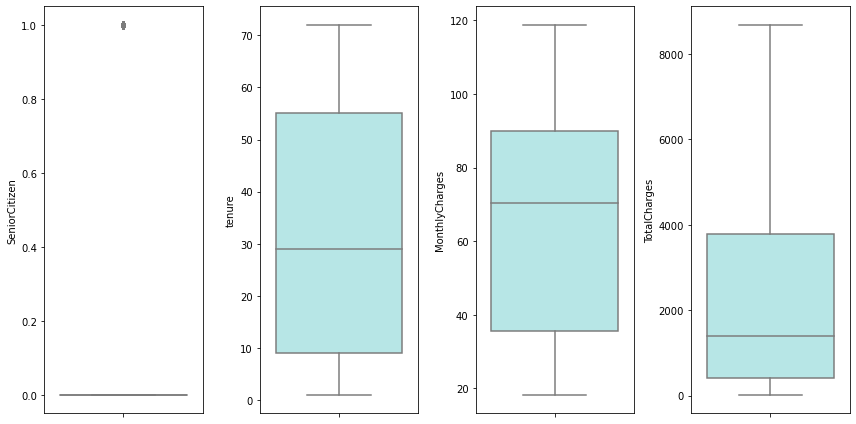

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='paleturquoise')
    plt.tight_layout()

Observation:

- `SenioCitizen` column is binary since value is 0 and 1. So we can ignore it in this plot.
- No outlier in column `tenure`, `MonthlyCharges`, `TotalCharges`
- No need to further specifically handle those columns

#### 2.2.2 KDE plot for knowing the distribution form

C:\Users\Selpha Yulida\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Selpha Yulida\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Selpha Yulida\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

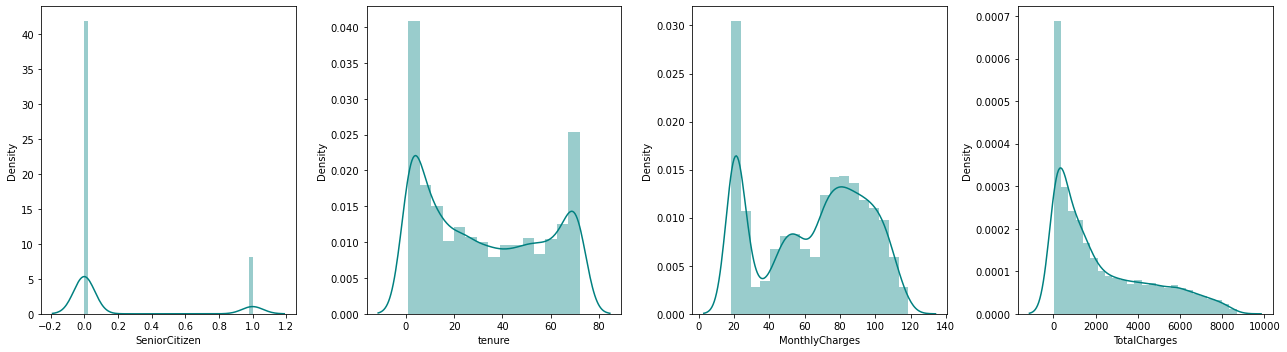

In [16]:
a = 1  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,5))
features = num
for i in range(0, len(features)):
    plt.subplot(a, b, c)
    sns.distplot(x=df[features[i]], color='teal')
    c = c + 1
    plt.xlabel(features[i])

plt.tight_layout()
plt.show()

Observation:
- `SeniorCitizen` is binary value and we can see that in this dataset the NonSeniorCitizen is more frequent
- `tenure` indicates the total amount of months that the customer has been with the company, from the fig above shows that there are also many new customers
- `MonthlyCharges` on the above fig indicates that there are more customers who has lower monthly charge for all their services from this telco company
- `TotalCharges` on the above fig has pos skew due to the freq of lower MonthlyCharges too

#### 2.2.3 Countplot for Categorical Columns

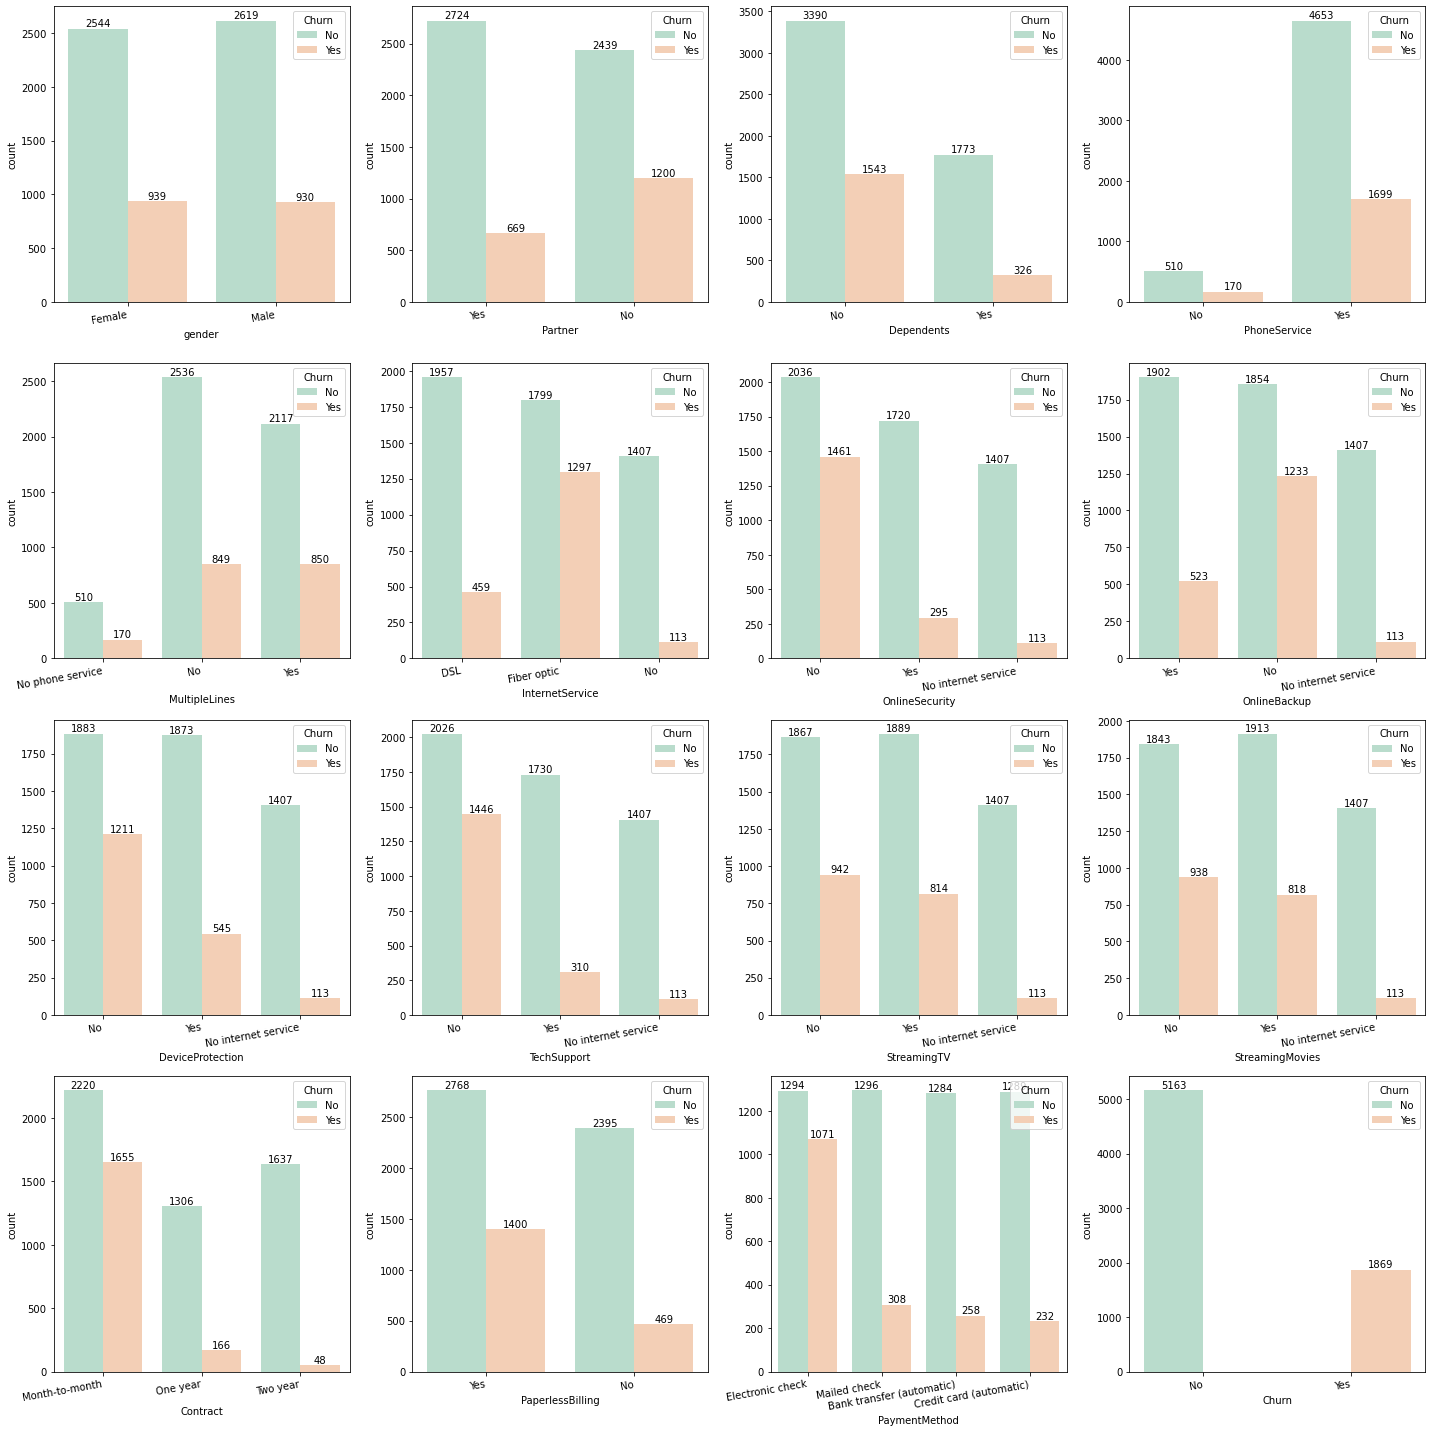

In [17]:
#  Countplot for Categorical Data

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for i in cat:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    ax=sns.countplot(data=df, x=df[i], palette='Pastel2', hue="Churn")
    c = c + 1
    plt.xticks(rotation=10, ha='right')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])

plt.tight_layout()
plt.show()

Observation:
1. From fig `gender` shows that the count of male and female is approx same for churn customer and we can say customer churn is not affected by gender.
2. From fig `Partner` shows that customers who has no partner (single) tend to churn.
3. From fig `Dependent` shows that customers without any dependents tend to churn (dependent could be children, parents, grandparents, etc).
4. From fig `PhoneService` shows that customers who subscribe to phone service with the company tend to churn, but customers who subsribes the service but didnt churn are more. Especially if we compare with no phone service data. So we will check to next datas.
5. From fig `MultipleLines` shows that the count of customers who subscribe and dont subscribe to multiplelines is approx same for churn customer. So we can say that this doesnt affect to churn behaviour.
6. From fig `InternetService`, the customers who have Fiberopic internet service are more likely to churn. And customer with no internet service have a very low churn rate.
7. From fig `OnlineSecurity` indicates that customers who dont subscribes to an additional online security service are more likely to churn.
8. From fig `OnlineBackup` indicates that customers who dont subscribes to an additional online backup service are more likely to churn.
9. From fig `DeviceProtection` indicates that customers who dont subscribes to an additional Device Protection plan for their Internet equipment are more likely to churn.
10. From fig `TechSupport` indicates that customers who dont subscribes to an Tech Support plan are more likely to churn.
11. From fig `StreamingTV` shows that the count of customers who use and dont use their Internet service to stream television programing is approx same for churn customer. So it may not affect to churn behaviour.
12. From fig `StreamingMovies` shows the similar result with `StreamingTV` fig/data. So it may not affect to churn behaviour.
13. From fig `Contract` shows that customers who have a month to month contract have a very high churn rate.
14. From fig `PaprlessBilling` shows that customers who have chosen paperless billing have higher churn rate. However paperless billing is good to have.
15. From fig `PaymentMethod` shows that customers who pay the bill through electronic check have higher churn rate.
16. From fig `Churn` shows that there are also many customers who do not churn, but we need to be careful because those who churn are 1869 or around 26.58%.

### 2.3 Multivariate Analysis

#### 2.3.1 Correlation Heatmap

<AxesSubplot:>

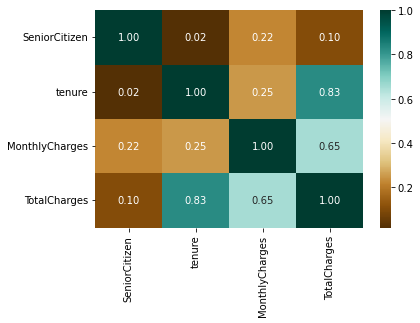

In [18]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='BrBG', fmt='.2f')

Observation:

There is a weak correlation between Tenure and MonthlyCharges, but we can see that there is a strong correlation between `TotalCharges` with `Tenure` followed by `MonthlyCharges`.

For `Tenure` and `TotalCharges` will be checked on next pairplot.

#### 2.3.2 Pairplot of the Data

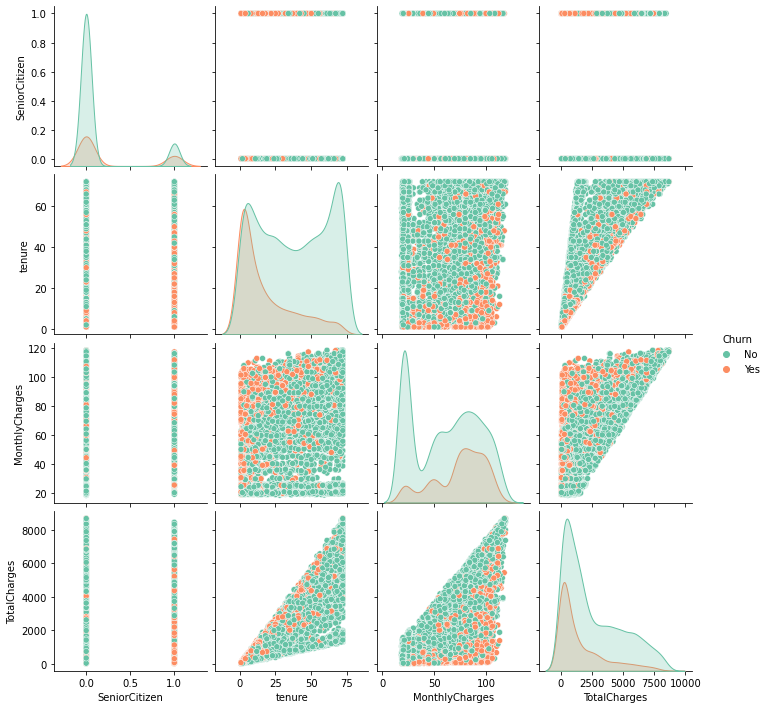

In [19]:
sns.pairplot(df, palette='Set2', hue='Churn')

Observation:

1. Non `SeniorCitizen` customers has higher churn rate.
2. Many customers churn on `tenure` around 0-25 months, so mostly they last for 0-2 years.
3. Many churn customers have `MonthlyCharges` in between 60-100 (higher charge), while we can see that most customers who don't churn have lower `MonthlyCharges` around 0-30.
4. Many churn customers have lower `TotalCharges`. As in the corr heatmap above, there is a strong correlation between `TotalCharges` and `tenure`, where customers with low tenure have higher churn rates. The same thing can be seen in this pairplot.

## 3. Deep-Dive Questions

Based on the results of the standard EDA above, there are several interesting things to do for further deep-dive analysis. Here are some of the questions we will find the answers to.
1. How many customers who are churn? And how much is the monthly charge for churn customers? How many % is that all?
2. How is the tenure based on contracts from customers who churn and don't?
3. How much is the monthly charge for churn/non-churn customers based on the payment method?
4. Customers who use paperless billing tend to churn, how is the payment method based on paperless billing for churn customers?
5. Standard EDA results show that non-senior citizens tend to churn, the same is true for customers who do not have partners and do not have dependents. What is the total customer churn with the combination of these three criteria?
6. How is the profile of churn customers (Senior/non-senior citizen, Partner, Dependent) who use and do not use multimedia services (TV and movie streaming)?
7. There is a tendency that customers who do not use add-on services excld multimedia (online security, online backup, device protection and tech support) have higher churn rates. How much is the Monthly Charge for churn and non-churn customers who subscribe to the service?
8. The results of the standard EDA above show that customers with fiber optic internet service tend to churn. How much is the customers monthly charge who use that service?

## 4. Answering Questions and Conclusion

### 1. How many customers who are churn? And how much is the monthly charge for churn customers? How many % is that all?

In [20]:
# How many customers who are churn?

print(df['Churn'].value_counts())

No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Churn'>

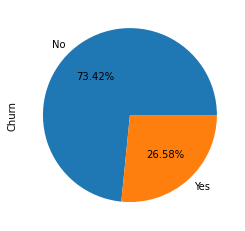

In [21]:
# How many % it is?

df['Churn'].value_counts().plot(kind='pie', autopct='%.2f%%')

Based on the above information, the total customer who churn is 1869 ppl or around 26.58%

In [22]:
# How much is the monthly charge for churn customers?

df.groupby(['Churn']).agg(
    sum_MonthlyCharges = ('MonthlyCharges','sum')
).reset_index()

,Churn,sum_MonthlyCharges
0,No,316530.15
1,Yes,139130.85


<AxesSubplot:ylabel='MonthlyCharges'>

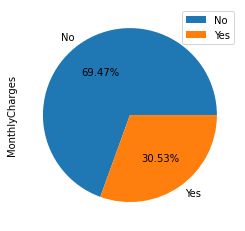

In [23]:
df.groupby(['Churn']).sum().plot(kind='pie', y='MonthlyCharges', autopct='%.2f%%')

Monthly charge customers who churn in total is 139,130.85 (currency unit). This shows that there is a potential loss of 139,130.85 (currency unit) per month or about 30.53% ytd. Is the loss figure proportional to the addition of new customers? It really needs to be considered and calculated by the company.

### 2. How is the tenure based on contracts from customers who churn and don't?

From the previous standard EDA, the month to month contract type tends to have a high churn rate. Let's see how the tenure profile is based on the contract. To simplify the analysis process, we will use only the mean and median data.

In [24]:
# How is the tenure based on contracts from customers who churn and don't?

df.groupby(['Churn','Contract']).agg(
    mean_tenure = ('tenure','mean'),
    med_tenure = ('tenure','median')
).reset_index()

,Churn,Contract,mean_tenure,med_tenure
0,No,Month-to-month,21.033333,16.0
1,No,One year,41.705972,43.0
2,No,Two year,56.948687,64.0
3,Yes,Month-to-month,14.016918,7.0
4,Yes,One year,44.963855,48.0
5,Yes,Two year,61.270833,65.5


The Standard EDA performed that the month to month contract type tends to have high churn rater. And from above table, we can see that the churn customers tend to have month to month contracts with an average tenure of about 14 months and a median value of 7 months. We can conclude that the customer took a contract per month for about 1 year until they churn.
Companies can't immediately delete month-to-month contracts to ensure their customers don't churn after the first year, because this could actually affect the sales. So the company needs a **new strategy/program to increase customer loyalty after the first year**.

### 3. How much is the monthly charge for churn/non-churn customers based on the payment method?

From the above standard EDA Electronic Check tends to have a high churn rate. Let's see how much is this per month.

In [25]:
df.groupby(['Churn','PaymentMethod']).agg(
    MC_Amount = ('MonthlyCharges','sum')
).reset_index()

,Churn,PaymentMethod,MC_Amount
0,No,Bank transfer (automatic),83539.10
1,No,Credit card (automatic),83229.20
2,No,Electronic check,96056.25
3,No,Mailed check,53705.60
4,Yes,Bank transfer (automatic),20091.90
5,Yes,Credit card (automatic),17946.60
6,Yes,Electronic check,84288.75
7,Yes,Mailed check,16803.60


From the table, it shows that the amount paid per month by customers who churn with the Electronic Check payment method is very high, which is equivalent to customers who do not churn with similar/other payment methods. The potential for such a big loss needs to be minimized by looking for the cause. Whether electronic check is the root of the problem or not, seeing that many customers who don't churn also using similar payment method. This requires further analysis and evaluation to reduce the potential big loss.

### 4. Customers who use paperless billing tend to churn, how is the payment method based on paperless billing for churn customers?

In [26]:
# Groupby Data
PB_PM_Count = df.groupby(['Churn','PaperlessBilling','PaymentMethod']).agg(
                PM_Count = ('PaymentMethod','count')
                ).reset_index()

# Filter for Churn customer only
PB_PM_Count_Churn = PB_PM_Count[PB_PM_Count['Churn']=='Yes']

# Drop Churn Column for easy reading (This analysis is for churn customer)
PB_PM_Count_Churn.drop(columns=['Churn'], inplace=True)

PB_PM_Count_Churn

C:\Users\Selpha Yulida\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,PaperlessBilling,PaymentMethod,PM_Count
8,No,Bank transfer (automatic),72
9,No,Credit card (automatic),64
10,No,Electronic check,204
11,No,Mailed check,129
12,Yes,Bank transfer (automatic),186
13,Yes,Credit card (automatic),168
14,Yes,Electronic check,867
15,Yes,Mailed check,179


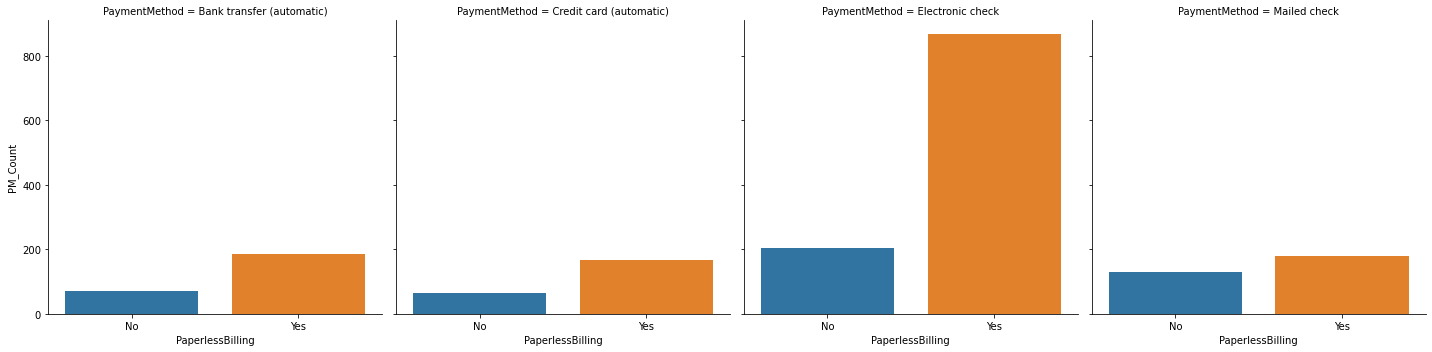

In [27]:
sns.catplot(kind='bar', data=PB_PM_Count_Churn, x='PaperlessBilling', y='PM_Count', col='PaymentMethod')
plt.show()

The results show that customers love using paperless billing. Using paperless billing is indeed good, although data shows that churn customers use paperless billing a lot. I don't think there's anything wrong with using paperless billing. But let's look at the number of users in the payment method used. Paperless billing with the Electronic check payment method is indeed a favorite of customers. The use of both tends to be very simple and practical. It is necessary to further analyze why the two favorites tend to produce higher trend churn. This can be taken into consideration in making billing and payment campaigns for telecom companies to increase Customer Lifetime Value (CLV).

### 5. Standard EDA results show that non-senior citizens tend to churn, the same is true for customers who do not have partners and do not have dependents. What is the total customer churn with the combination of these three criteria?

In [28]:
# Churn & No Partner & No Dependents

Churn_NPND = df[(df['Churn']=='Yes') & (df['Partner']=='No') & (df['Dependents']=='No')]
Churn_NPND.shape

(1123, 21)

Because there is a tendency to churn from customers who are the younger generation, do not have partners and do not have dependents, this becomes interesting to study further. From 7032 customers in this research object and 1869 customers who churn, 1123 churn customers are a combination of the three profiles, namely non-senior citizen, not partnered and not dependent. This figure is about 15.97% of the total customers, and 60.09% of the total churn customers. What happened to the younger, free and freedom generation?

### 6. How is the profile of churn customers (Senior/non-senior citizen, Partner, Dependent) who use and do not use multimedia services (TV and movie streaming)?

In [29]:
# Churn - StreamingTV - SeniorCitizen - Prtner - Dependents (count)

# Groupby Data
Prof_TV_Count = df.groupby(['Churn','StreamingTV','SeniorCitizen', 'Partner', 'Dependents']).agg(
                Count = ('Dependents','count')
                ).sort_values('Count', ascending=False).reset_index()

# Filter for Churn customer only and remove rows of Streaming TV No internet service
Prof_TV_Count_Churn = Prof_TV_Count[(Prof_TV_Count['Churn']=='Yes') & (Prof_TV_Count['StreamingTV']!='No internet service')]

# Drop Churn Column for easy reading (This analysis is for churn customer)
Prof_TV_Count_Churn.drop(columns=['Churn'], inplace=True)

C:\Users\Selpha Yulida\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
# Let's see how's the profile of Churn customers who dont streamn TV
Prof_TV_Count_Churn[Prof_TV_Count_Churn['StreamingTV']=='No']

,StreamingTV,SeniorCitizen,Partner,Dependents,Count
5,No,0,No,No,460
12,No,1,No,No,149
21,No,0,Yes,Yes,103
22,No,0,Yes,No,95
24,No,1,Yes,No,84
27,No,0,No,Yes,42
36,No,1,Yes,Yes,7
42,No,1,No,Yes,2


In [31]:
# Let's see how's the profile of Churn customers who streamn TV
Prof_TV_Count_Churn[Prof_TV_Count_Churn['StreamingTV']=='Yes']

,StreamingTV,SeniorCitizen,Partner,Dependents,Count
8,Yes,0,No,No,314
13,Yes,0,Yes,No,140
16,Yes,1,No,No,124
19,Yes,0,Yes,Yes,106
23,Yes,1,Yes,No,92
29,Yes,0,No,Yes,25
34,Yes,1,Yes,Yes,13


In [32]:
# Churn - StreamingMovies - SeniorCitizen - Prtner - Dependent (count)

# Groupby Data
Prof_Movie_Count = df.groupby(['Churn','StreamingMovies','SeniorCitizen', 'Partner', 'Dependents']).agg(
                Count = ('Dependents','count')
                ).sort_values('Count', ascending=False).reset_index()

# Filter for Churn customer only and remove rows of Streaming TV No internet service
Prof_Movie_Count_Churn = Prof_Movie_Count[(Prof_Movie_Count['Churn']=='Yes') & (Prof_Movie_Count['StreamingMovies']!='No internet service')]

# Drop Churn Column for easy reading (This analysis is for churn customer)
Prof_Movie_Count_Churn.drop(columns=['Churn'], inplace=True)

C:\Users\Selpha Yulida\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
# Let's see how's the profile of Churn customers who dont streamn movies
Prof_Movie_Count_Churn[Prof_Movie_Count_Churn['StreamingMovies']=='No']

,StreamingMovies,SeniorCitizen,Partner,Dependents,Count
5,No,0,No,No,457
12,No,1,No,No,148
21,No,0,Yes,No,107
23,No,0,Yes,Yes,102
25,No,1,Yes,No,67
27,No,0,No,Yes,45
34,No,1,Yes,Yes,10
42,No,1,No,Yes,2


In [34]:
# Let's see how's the profile of Churn customers who streamn movies
Prof_Movie_Count_Churn[Prof_Movie_Count_Churn['StreamingMovies']=='Yes']

,StreamingMovies,SeniorCitizen,Partner,Dependents,Count
8,Yes,0,No,No,317
15,Yes,0,Yes,No,128
16,Yes,1,No,No,125
18,Yes,1,Yes,No,109
20,Yes,0,Yes,Yes,107
29,Yes,0,No,Yes,22
35,Yes,1,Yes,Yes,10


From the four tables above, we can see that there is no significant difference in the profiles. In accordance with the results of the EDA standard, it seems that there is no effect of churn with multimedia services. However, this analysis is used to map the churn customer's multimedia user profile.

Customers who enjoy TV streaming services are dominated by the younger, free and freedom generation as in EDA point 5. Likewise, those who do not enjoy TV streaming services. In fact, based on the total, this generation does not use TV streaming services.

The same profile also occurs for customers who enjoy and do not enjoy movie streaming services. This also needs to be a concern for telecom companies because the population of this generation is more churn. Are there problems with multimedia services or other matters related to costs, or even some of these generations very busy with work, and other activities or even are more focused on social media. These things need to be reviewed further by telecom companies, either by using other datasets that focus on customer profiles and preferences for multimedia services or by using customer survey services.

With further deep analysis of customer segmentation, it is hoped that telecom companies can be more targeted in building their campaigns to increase CLV.

### 7. There is a tendency that customers who do not use add-on services excld multimedia (online security, online backup, device protection and tech support) have higher churn rates. How much is the Monthly Charge for churn and non-churn customers who subscribe to the service?

**Online Security Add-on**

In [35]:
# Let's check the Online Security add-on service

# Groupby data
OnlineSecurity_dt= df.groupby(['Churn','OnlineSecurity']).agg(
                Mean_MonthlyCharges = ('MonthlyCharges','mean'),
                Med_MonthlyCharges = ('MonthlyCharges','median')
                ).reset_index()

#Filter No internet service
OnlineSecurity_dt= OnlineSecurity_dt[OnlineSecurity_dt['OnlineSecurity']!='No internet service']

OnlineSecurity_dt

,Churn,OnlineSecurity,Mean_MonthlyCharges,Med_MonthlyCharges
0,No,No,74.625860,76.525
2,No,Yes,78.405552,79.375
3,Yes,No,77.181896,80.250
5,Yes,Yes,81.581356,84.700


**Online Backup Add-on**

In [36]:
# Let's check the Online Backup add-on service

# Groupby data
OnlineBackup_dt= df.groupby(['Churn','OnlineBackup']).agg(
                Mean_MonthlyCharges = ('MonthlyCharges','mean'),
                Med_MonthlyCharges = ('MonthlyCharges','median')
                ).reset_index()

#Filter No internet service
OnlineBackup_dt= OnlineBackup_dt[OnlineBackup_dt['OnlineBackup']!='No internet service']

OnlineBackup_dt

,Churn,OnlineBackup,Mean_MonthlyCharges,Med_MonthlyCharges
0,No,No,70.236327,71.45
2,No,Yes,82.322634,84.80
3,Yes,No,74.512449,77.75
5,Yes,Yes,85.956788,90.60


**Device Protection Add-on**

In [37]:
# Let's check the Device Protection add-on service

# Groupby data
DeviceProtection_dt= df.groupby(['Churn','DeviceProtection']).agg(
                Mean_MonthlyCharges = ('MonthlyCharges','mean'),
                Med_MonthlyCharges = ('MonthlyCharges','median')
                ).reset_index()

#Filter No internet service
DeviceProtection_dt= DeviceProtection_dt[DeviceProtection_dt['DeviceProtection']!='No internet service']

DeviceProtection_dt

,Churn,DeviceProtection,Mean_MonthlyCharges,Med_MonthlyCharges
0,No,No,68.877377,70.15
2,No,Yes,83.875974,85.80
3,Yes,No,73.288398,76.05
5,Yes,Yes,88.214679,94.70


**Tech Support Add-on**

In [38]:
# Let's check the Device Protection add-on service

# Groupby data
TechSupport_dt= df.groupby(['Churn','TechSupport']).agg(
                Mean_MonthlyCharges = ('MonthlyCharges','mean'),
                Med_MonthlyCharges = ('MonthlyCharges','median')
                ).reset_index()

#Filter No internet service
TechSupport_dt= TechSupport_dt[TechSupport_dt['TechSupport']!='No internet service']

TechSupport_dt

,Churn,TechSupport,Mean_MonthlyCharges,Med_MonthlyCharges
0,No,No,73.173198,75.150
2,No,Yes,80.084913,80.775
3,Yes,No,76.562794,79.775
5,Yes,Yes,84.256290,89.600


**4 Add-on Services**

In [39]:
# Groupby data
Add_on_dt= df.groupby(['Churn','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']).agg(
                Mean_MonthlyCharges = ('MonthlyCharges','mean'),
                Med_MonthlyCharges = ('MonthlyCharges','median')
                ).reset_index()

#Filter No internet service
Add_on_dt= Add_on_dt[(Add_on_dt['OnlineSecurity']=='Yes') & (Add_on_dt['OnlineBackup']=='Yes') & (Add_on_dt['DeviceProtection']=='Yes') & (Add_on_dt['TechSupport']=='Yes')]

Add_on_dt

,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Mean_MonthlyCharges,Med_MonthlyCharges
16,No,Yes,Yes,Yes,Yes,90.583108,89.9
33,Yes,Yes,Yes,Yes,Yes,98.270000,109.5


Churn customers tend to have higher monthly charges, both in each of the above add-on services and in their combined use. The difference between the addition of add-on services to churn and non-churn customers have a monthly charge difference of 3-10 (currency unit) both in the mean and median, for each add-on or in combination. But what's interesting about the data above is that they both have add-on services, why do churn customers have a higher monthly charge? Is there a difference in add-on rates? Or the higher paying customers don't know/ don't have a certain promo package for the service?

### 8. The results of the standard EDA above show that customers with fiber optic internet service tend to churn. How much in total is the customers monthly charge who use that service?

In [40]:
IS_data = df.groupby(['Churn','InternetService']).agg(
                MonthlyCharges = ('MonthlyCharges','sum')
                ).reset_index()
IS_data

,Churn,InternetService,MonthlyCharges
0,No,DSL,117811.45
1,No,Fiber optic,168984.35
2,No,No,29734.35
3,Yes,DSL,22529.20
4,Yes,Fiber optic,114300.05
5,Yes,No,2301.60


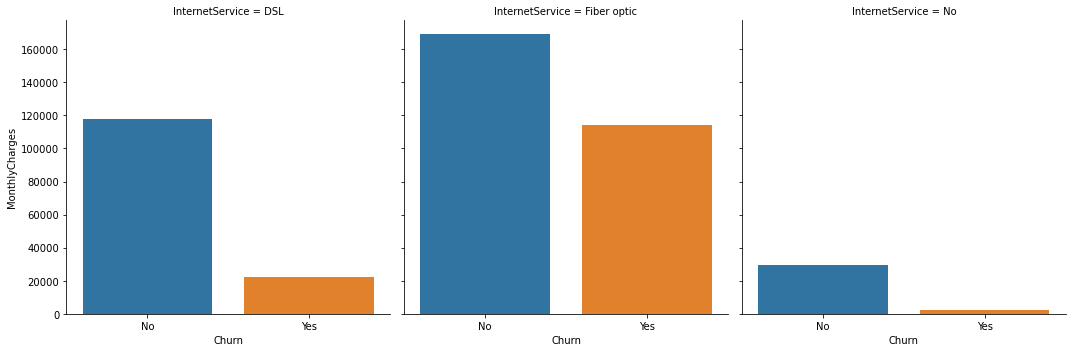

In [41]:
sns.catplot(kind='bar', data=IS_data, x='Churn', y='MonthlyCharges', col='InternetService') 
plt.show()

Customers who use fiber optics tend to churn when compared to DSL. However, the ratio of customers who churn and not on fiber optic is greater. The total monthly charge for fiber optic customers who churn is 114,300.05 (currency units), or about 25% of the total monthly charge. This figure is quite uncomfortable because there is a loss of 25% per month, and is it still inline or reasonable when compared to the addition of a monthly charge from a new customer? This deserves to be highlighted by the telecom company regarding whether there are (or frequently) technical problems on the fiber optic network?

### Conclusion

After performing EDA standard and also deep dive analysis, here are some conclusions that can be got.

1. The total customer who churn is 1869 ppl or around 26.58% with Monthly charge in total is 139,130.85 (currency unit). This shows that there is a potential loss of 139,130.85 (currency unit) per month or about 30.53% ytd. 
2. The churn customers tend to have month to month contracts with an average tenure of about 14 months and a median value of 7 months. We can conclude that the customer took a contract per month for about 1 year until they churn.
3. Customers who churn with the Electronic Check payment method is very high 84,288.75 (currency unit), which is equivalent to customers who do not churn with similar/other payment methods.
4. Using paperless billing is indeed good, although data shows that churn customers use paperless billing a lot. Seems there's anything wrong with using paperless billing.  Paperless billing with the Electronic check payment method is indeed customers favorite. The use of both tends to be very simple and practical. 
5. From 7032 customers in this research object and 1869 customers who churn, 1123 churn customers are a combination of the three profiles, namely non-senior citizen, not partnered and not dependent. This figure is about 15.97% of the total customers, and 60.09% of the total churn customers.
6. Customers who enjoy TV and movie streaming  services are dominated by the younger, free and freedom generation as in above profile (non-senior citizen, no partner, no dependents). Likewise, those who do not actually use those multimedia services. 
7. Churn customers tend to have higher monthly charges, both in each of the 4 add-on services and in their combined use (online security, online backup, device protection and tech support). The difference between the addition of add-on services to churn and non-churn customers have a monthly charge difference of 3-10 (currency unit) both in the mean and median, for each add-on or in combination. But why even if they have additional services, why do customers who churn have higher monthly charges than those who don't churn? There may be differences in rates/packages/promotions used for the add-on services.
8. Customers who use fiber optics tend to churn when compared to DSL. However, the ratio of customers who churn and not on fiber optic is greater. The total monthly charge for fiber optic customers who churn is 114,300.05 (currency units), or about 25% of the total monthly charge. This figure is quite uncomfortable because there is a loss of 25% per month (ytd). This deserves to be highlighted by the telecom company regarding whether there are (or frequently) technical problems on the fiber optic network?

In conclusion, it turns out that it is very important for telecom companies to create new strategies/campaign programs to increase Customer Lifetime Value (CLV). With the churn rate that tends to be high, especially when viewed from the total monthly charge, there is a fairly large potential loss. Some technical matters such as internet network equipment and the quality of add-on services and multimedia can also be considered and reviewed. In addition, it is also important to know more about the customer persona so that campaign programs are more targeted.